## Assignment 5
### Meenu Ravi
### May 7 2021

### Question 1: 20 points

#### Train a deep MLP on the MNIST dataset.

In [1]:
import sys
import sklearn
import tensorflow.compat.v1 as tf
import numpy as np
import os
from tensorflow import keras
from sklearn.linear_model import Perceptron
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# from multilayer_perceptron import MultilayerPerceptron

#### You can load it with keras.datasets.mnist.load_data()


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

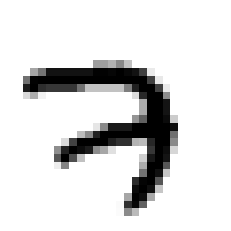

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train,batch_size=32,epochs=20)


Epoch 1/20
1719/1719 [==============================] - 6s 2ms/step - loss: 1.0483 - accuracy: 0.7215
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3103 - accuracy: 0.9111
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2556 - accuracy: 0.9255
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2133 - accuracy: 0.9390
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1859 - accuracy: 0.9466
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1652 - accuracy: 0.9516
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1465 - accuracy: 0.9593
Epoch 8/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1311 - accuracy: 0.9628
Epoch 9/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9665
Epoch 10/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.107

In [52]:
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9770


0.9769999980926514

#### Try to achieve at least 98% accuracy tweaking the architecture and hyperparameters like learning rate, batch size, etc.


In [71]:
learning_rate=0.01

In [75]:
optimizer = keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
for i in range(30,35):
    model.fit(X_train, y_train,batch_size=i,epochs=20,verbose=False)
    acc=model.evaluate(X_test, y_test)[1]
    print("batch size: {batch}: {accu} accuracy".format(batch = i, accu = acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9808
batch size: 30: 0.9807999730110168 accuracy
313/313 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9808
batch size: 31: 0.9807999730110168 accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9808
batch size: 32: 0.9807999730110168 accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9811
batch size: 33: 0.9811000227928162 accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9811
batch size: 34: 0.9811000227928162 accuracy


In [80]:
model.fit(X_train, y_train,batch_size=34,epochs=20,verbose=False)
acc=model.evaluate(X_test, y_test)[1]
acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9811


0.9811000227928162

#### Try using randomized grid search. use early stopping.


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [109]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
    return model

In [110]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [111]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.4606 - val_loss: 3.2317
Epoch 2/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.2225 - val_loss: 3.2017
Epoch 3/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.2072 - val_loss: 3.1807
Epoch 4/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.1871 - val_loss: 3.1744
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.1732 - val_loss: 3.1977
Epoch 6/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.1712 - val_loss: 3.1562
Epoch 7/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.1670 - val_loss: 3.1587
Epoch 8/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.1576 - val_loss: 3.1461
Epoch 9/100
1146/1146 [==============================] - 4s 3ms/step - loss: 3.1522 - val_loss: 3.3405
Epoch 10/100

1146/1146 [==============================] - 2s 1ms/step - loss: 3.2257 - val_loss: 3.2225
Epoch 11/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2290 - val_loss: 3.2204
Epoch 12/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2235 - val_loss: 3.2186
Epoch 13/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2200 - val_loss: 3.2170
Epoch 14/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2197 - val_loss: 3.2154
Epoch 15/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2171 - val_loss: 3.2139
Epoch 16/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2198 - val_loss: 3.2128
Epoch 17/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2160 - val_loss: 3.2119
Epoch 18/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2136 - val_loss: 3.2112
Epoch 19/100
1146/1146 [==============================] - 2s 1ms/step - loss:

Epoch 89/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2045 - val_loss: 3.2032
Epoch 90/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2124 - val_loss: 3.2031
Epoch 91/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2075 - val_loss: 3.2031
Epoch 92/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2096 - val_loss: 3.2030
Epoch 93/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2037 - val_loss: 3.2030
Epoch 94/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2070 - val_loss: 3.2030
Epoch 95/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2053 - val_loss: 3.2029
Epoch 96/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2088 - val_loss: 3.2029
Epoch 97/100
1146/1146 [==============================] - 2s 1ms/step - loss: 3.2081 - val_loss: 3.2029
Epoch 98/100
1146/1146 [==============================] - 2s 1ms

1146/1146 [==============================] - 2s 2ms/step - loss: 3.2734 - val_loss: 3.2610
Epoch 5/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2579 - val_loss: 3.2493
Epoch 6/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2479 - val_loss: 3.2399
Epoch 7/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2358 - val_loss: 3.2323
Epoch 8/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2332 - val_loss: 3.2254
Epoch 9/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2256 - val_loss: 3.2196
Epoch 10/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2199 - val_loss: 3.2149
Epoch 11/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2184 - val_loss: 3.2111
Epoch 12/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.2124 - val_loss: 3.2077
Epoch 13/100
1146/1146 [==============================] - 2s 2ms/step - loss: 3.20

1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 6/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 8/100
1146/1146 [==============================] - 5s 5ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 9/100
1146/1146 [==============================] - 5s 5ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 10/100
1146/1146 [==============================] - 5s 5ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 11/100
573/573 [==============================] - 1s 2ms/step - loss: 3.3322
[

1146/1146 [==============================] - 4s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 9/100
1146/1146 [==============================] - 4s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 10/100
1146/1146 [==============================] - 4s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 11/100
573/573 [==============================] - 1s 2ms/step - loss: 3.3322
[CV] END learning_rate=0.0012666094081431217, n_hidden=3, n_neurons=54; total time=  53.5s
Epoch 1/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3206 - val_loss: 3.3322
Epoch 2/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 3/100
1146/1146 [==============================] - 4s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 4/100
1146/1146 [==============================] - 4s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 3.3322 - val_loss: 3.3322
Epoch 6/100
1

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C859CC8FC8>,
                   param_distributions={'learning_rate': [0.007926786072535396,
                                                          0.0022657095350911063,
                                                          0.0005043303362766653,
                                                          0.007742587892348439,
                                                          0.019970945853692766,
                                                          0.006054673261262084,
                                                          0.010585777267013702,
                                                          0.001562594624790383,
                                                          0.00069745749393160...
                                                          0.0007866198235098514,
                                                 

In [112]:
rnd_search_cv.best_params_

{'n_neurons': 60, 'n_hidden': 2, 'learning_rate': 0.0005043303362766653}

In [113]:
rnd_search_cv.best_score_

-3.217048724492391

In [114]:
rnd_search_cv.best_estimator_

In [115]:
rnd_search_cv.score(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.3322


-3.3322105407714844

In [116]:
model = rnd_search_cv.best_estimator_.model
model

In [117]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.3322


3.3322105407714844

#### Use checkpoints

In [118]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
test = model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.9634 - val_loss: 1.0755
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9476 - val_loss: 0.6480
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6232 - val_loss: 0.5034
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4989 - val_loss: 0.4344
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4390 - val_loss: 0.3909
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4015 - val_loss: 0.3627
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3827 - val_loss: 0.3417
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3473 - val_loss: 0.3267
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3396 - val_loss: 0.3125
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3005


In [11]:
test

0.30045247077941895

#### Plot learning curves using TensorBoard.


In [12]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [13]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_05_02-20_06_00'

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
learning_rate=0.01
optimizer = keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9797 - accuracy: 0.7436 - val_loss: 0.3093 - val_accuracy: 0.9166
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3013 - accuracy: 0.9136 - val_loss: 0.2403 - val_accuracy: 0.9356
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2426 - accuracy: 0.9305 - val_loss: 0.2072 - val_accuracy: 0.9406
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2079 - accuracy: 0.9416 - val_loss: 0.1835 - val_accuracy: 0.9506
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1812 - accuracy: 0.9470 - val_loss: 0.1616 - val_accuracy: 0.9578
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1590 - accuracy: 0.9539 - val_loss: 0.1488 - val_accuracy: 0.9604
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1450 - accuracy: 0.9578 - val_loss: 0.1329 - val_accuracy:

In [136]:
import tensorflow as tf

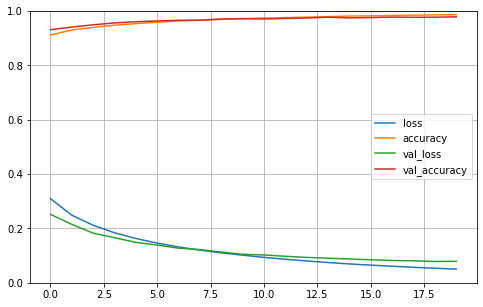

In [141]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Plot the network architecture

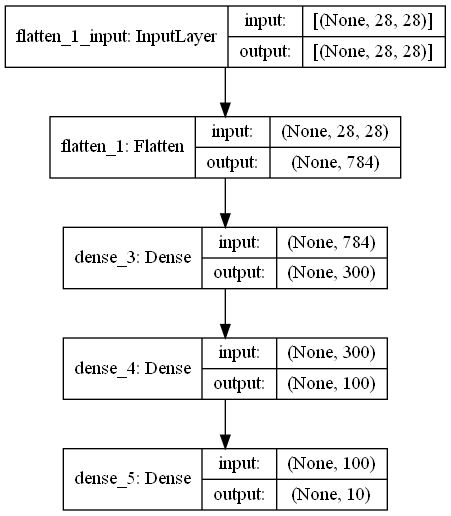

In [29]:
keras.utils.plot_model(model, show_shapes=True)